# Simulation of the spatial model
## Spatial distribution of the four densities in a cell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from spatial.oneD.Simulation1D import Simulation1D
%matplotlib inline

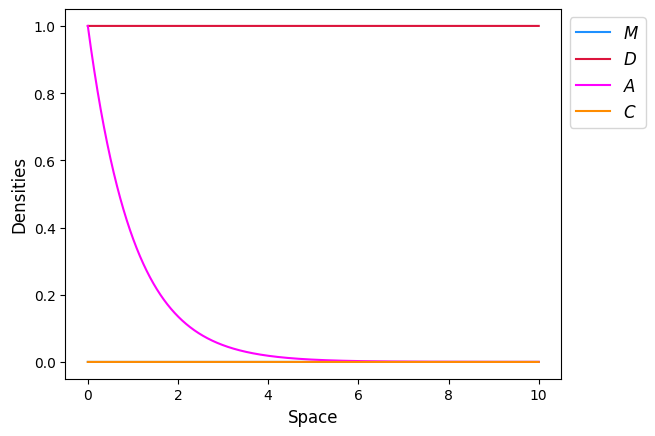

In [2]:
domain_size = 10
nb_space_points = 10000
duration_time = 500
time_step = 0.01

a_sim = Simulation1D(domain_size, nb_space_points, duration_time, time_step)

k = 1
ka = 1
diffusion_coefs = natural_d, aox_d = 1, 2
transport_space_cst = 10
transport_coefs = natural_t, radiation_t = 0.2, 0.1
fragmentation_coefs = natural_f, aox_f, radiation_f = 0.01, 1, 2
permeability_coefs = ordinate, abscissa, statin_impact = 1, 0.45, 1.2
ratio_f_rate_dimers_complexes = 1.1

a_sim.setup_atm_apoe_system(k, ka, diffusion_coefs, transport_coefs, fragmentation_coefs, permeability_coefs,
                            ratio_f_rate_dimers_complexes, transport_space_cst)

monomers_initial = np.zeros(nb_space_points)
dimers_initial = np.ones(nb_space_points)
apoe_initial = np.exp(- 1 * a_sim.spatial_space.space)
complexes_initial = np.zeros(nb_space_points)

a_sim.setup_system_initial_conditions(monomers_initial, dimers_initial, apoe_initial, complexes_initial)

antioxidant_times = ()
irradiation_times = ()
statin_times = ()

a_sim.setup_experimental_conditions(antioxidant_times, irradiation_times, statin_times)
a_sim.plot_all_densities()

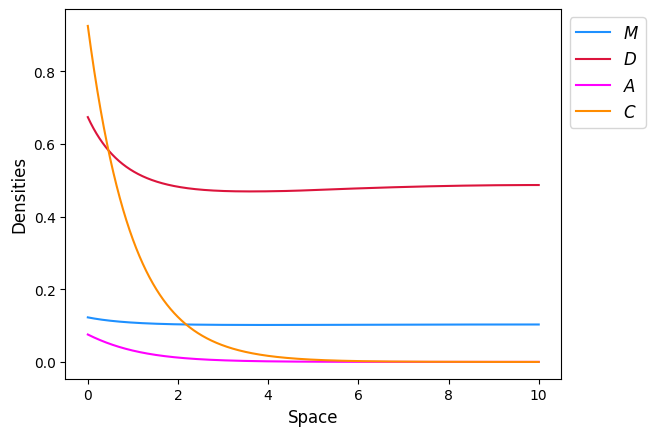

In [9]:
a_sim.simulate()  # careful, hight memory usage
a_sim.plot_all_densities()

## Evolution of the crown over time

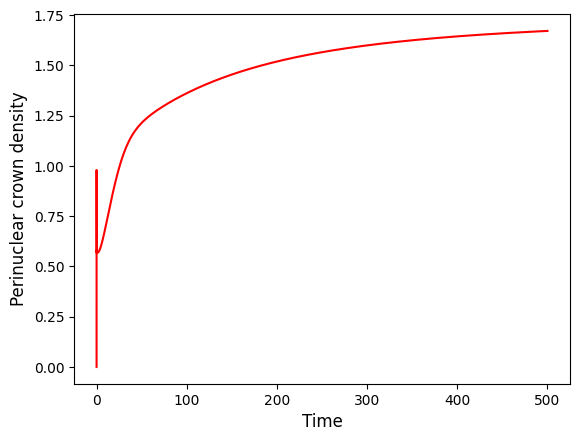

In [11]:
a_sim.plot_crown_density_over_time()

## Evolution of the total mass over time

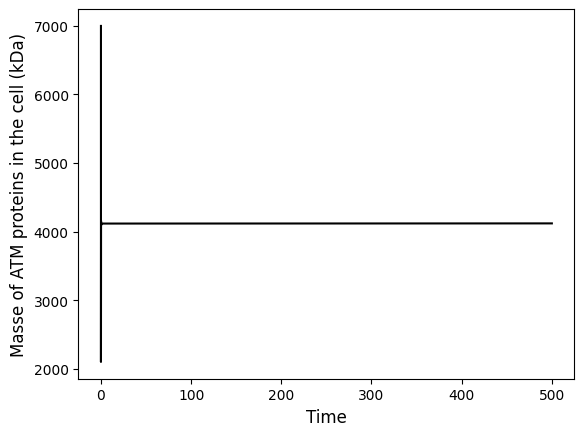

In [10]:
a_sim.plot_system_mass_over_time()

## Flux of ATM inside the nucleus over time

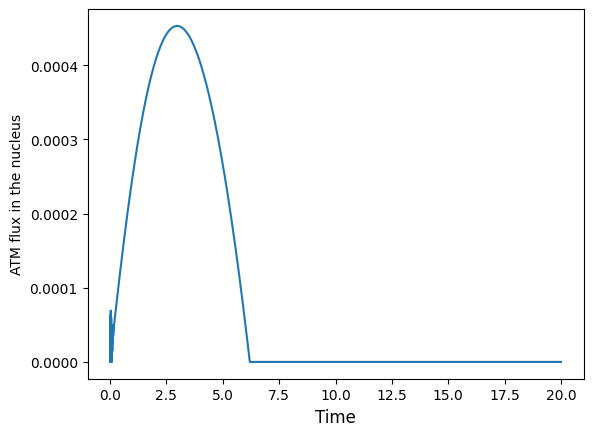

In [4]:
duration_time = 20
a_sim = Simulation1D(domain_size, nb_space_points, duration_time, time_step)
a_sim.setup_atm_apoe_system(k, ka, diffusion_coefs, transport_coefs, fragmentation_coefs, permeability_coefs,
                            ratio_f_rate_dimers_complexes, transport_space_cst)
a_sim.setup_system_initial_conditions(monomers_initial, dimers_initial, apoe_initial, complexes_initial)
a_sim.setup_experimental_conditions(antioxidant_times, irradiation_times, statin_times)
a_sim.simulate()
a_sim.plot_flux_nucleus_over_time()

## Impact of the spatial space size on the perinuclear crown
We make the domain size vary from 1 to 100 and see its impacts on the perinuclear crown value. The PC value is taken at a time of 35 for each simulation
### When the quantity of ATM increases with the size of the domain.

In [9]:
def simulate_impact_domain_size(domain_sizes: np.ndarray) -> list[float]:
    crown_values = []
    
    for size in domain_sizes:
        duration_time = 35
        nb_space_points = int(1000 * size)
        sim = Simulation1D(size, nb_space_points, duration_time, time_step)
        initialize_simulation(sim)
        sim.simulate()
        crown_values.append(sim.crown_density_over_time[-1])
        
    return crown_values
        

def initialize_simulation(sim: Simulation1D):
    sim.setup_atm_apoe_system(k, ka, diffusion_coefs, transport_coefs, fragmentation_coefs, permeability_coefs,
                              ratio_f_rate_dimers_complexes, transport_space_cst)
    monomers_init = np.zeros(sim.spatial_space.nb_points)
    dimers_init = np.ones(sim.spatial_space.nb_points)
    apoe_init = np.exp(-1 * sim.spatial_space.space)
    complexes_init = np.zeros(sim.spatial_space.nb_points)
    sim.setup_system_initial_conditions(monomers_init, dimers_init, apoe_init, complexes_init)
    
    sim.setup_experimental_conditions(antioxidant_times, irradiation_times, statin_times)
    

def plot_crown_along_domain_size(domain_sizes: np.ndarray, perinuclear_crown_values: np.ndarray):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    erythrocyte_path = "/home/sbure/Documents/ALZHEIMER/CODES/erythrocytes.png"
    position_erythrocyte = 2
    neuron_path = "/home/sbure/Documents/ALZHEIMER/CODES/neuron.png"
    position_neuron = 14
    oocyte_path = "/home/sbure/Documents/ALZHEIMER/CODES/oocyte.png"
    position_oocyte = 27
    paths = [erythrocyte_path, neuron_path, oocyte_path]
    positions = [position_erythrocyte, position_neuron, position_oocyte]
    
    for img_path, pos in zip(paths, positions):
        img = Image.open(img_path)
        img.thumbnail((50, 50), Image.ANTIALIAS)  # resize the image while conserving the proportions
        imagebox = OffsetImage(img)
        ab = AnnotationBbox(imagebox, (pos, -0.1), xycoords=('data', 'axes fraction'),
                            boxcoords="offset points", frameon=False)
        ax.add_artist(ab)
    plt.plot(domain_sizes, perinuclear_crown_values)
    ax.set_xlabel("Domain size - $L$", fontsize=14)
    ax.set_ylabel("Perinuclear crown density", fontsize=12)
    
    plt.show()

In [4]:
domain_sizes = np.linspace(1, 30, 30)

pc_values = simulate_impact_domain_size(domain_sizes)

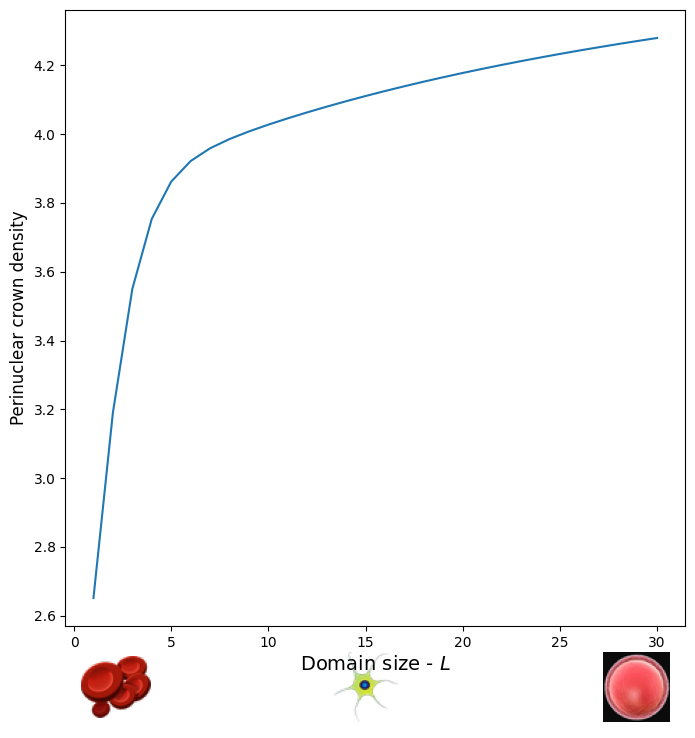

In [10]:
plot_crown_along_domain_size(domain_sizes, pc_values)

### When the quantity of ATM is constant, regardless of the size of the domain

In [6]:
def simulate_impact_domain_size_with_constant_dimers_quantity(domain_sizes: np.ndarray) -> list[float]:
    crown_values = []
    
    for size in domain_sizes:
        duration_time = 35
        nb_space_points = int(1000 * size)
        sim = Simulation1D(size, nb_space_points, duration_time, time_step)
        initialize_simulation_constant_dimers_quantity(sim, size)
        sim.simulate()
        crown_values.append(sim.crown_density_over_time[-1])
        
    return crown_values

def initialize_simulation_constant_dimers_quantity(sim: Simulation1D, domain_size: float):
    sim.setup_atm_apoe_system(k, ka, diffusion_coefs, transport_coefs, fragmentation_coefs, permeability_coefs,
                              ratio_f_rate_dimers_complexes, transport_space_cst)
    monomers_init = np.zeros(sim.spatial_space.nb_points)
    dimers_init = np.ones(sim.spatial_space.nb_points) / domain_size
    apoe_init = np.exp(-1 * sim.spatial_space.space)
    complexes_init = np.zeros(sim.spatial_space.nb_points)
    sim.setup_system_initial_conditions(monomers_init, dimers_init, apoe_init, complexes_init)
    
    sim.setup_experimental_conditions(antioxidant_times, irradiation_times, statin_times)

In [7]:
domain_sizes = np.linspace(1, 30, 30)
pc_values_constant_dimers = simulate_impact_domain_size_with_constant_dimers_quantity(domain_sizes)

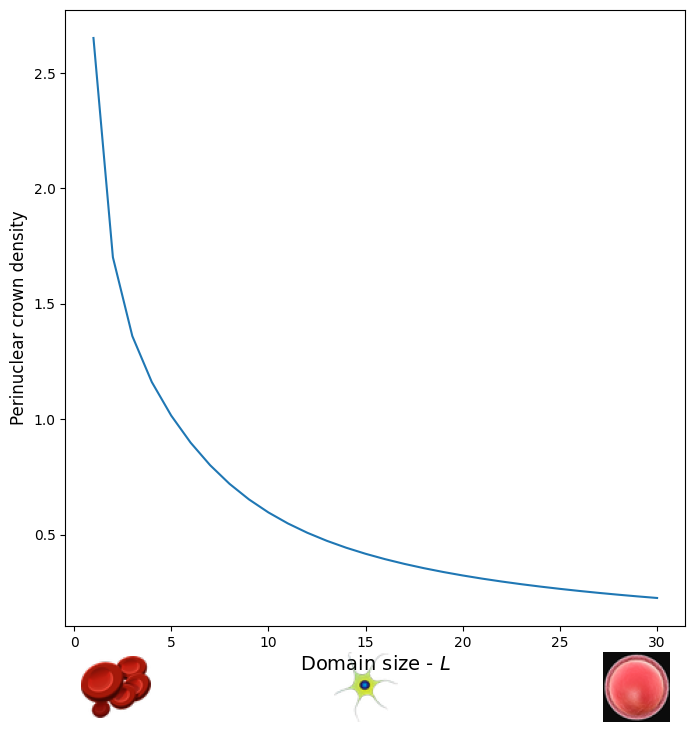

In [11]:
plot_crown_along_domain_size(domain_sizes, pc_values_constant_dimers)